# Diabetes Prediction using Logistic Regression



This notebook builds and evaluates machine learning models to predict diabetes based on clinical features from the Pima Indians Diabetes dataset. The main focus is on logistic regression, with several other classifiers used for comparison.

Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data


### 1. Importing libraries

In this section I import the scientific Python stack (NumPy, pandas, Matplotlib, Seaborn) together with scikit-learn, XGBoost. These libraries provide tools for data manipulation, visualization, model building, model evaluation and model persistence.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm


import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split , StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    accuracy_score, brier_score_loss
)
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

### 2. Loading and understanding the dataset

Here I load the Pima Indians Diabetes dataset and take an initial look at the first rows. Each row represents a female patient, and the columns capture clinical measurements such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and the binary outcome (diabetes or not).


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #333333; color: white; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 14px; color: #254441; text-align: left;">Pregnancies</td>
      <td style="font-size: 14px; text-align: left;">Number of pregnancies</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 14px; color: #3850A0; text-align: left;">Glucose</td>
      <td style="font-size: 14px; text-align: left;">Glucose level in blood</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 14px; color: #8C001A; text-align: left;">BloodPressure</td>
      <td style="font-size: 14px; text-align: left;">Blood pressure measurement</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 14px; color: #FFAA33; text-align: left;">SkinThickness</td>
      <td style="font-size: 14px; text-align: left;">Thickness of the skin</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 14px; color: #FF0077; text-align: left;">Insulin</td>
      <td style="font-size: 14px; text-align: left;">Insulin level in blood</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 14px; color: #009A80; text-align: left;">BMI</td>
      <td style="font-size: 14px; text-align: left;">Body mass index</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 14px; color: #660099; text-align: left;">DiabetesPedigreeFunction</td>
      <td style="font-size: 14px; text-align: left;">Diabetes percentage</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #4B0082; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 14px; color: #4B0082; text-align: left;">Age</td>
      <td style="font-size: 14px; text-align: left;">Age</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 14px; color: #0000FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 14px; color: #0000FF; text-align: left;">Outcome</td>
      <td style="font-size: 14px; text-align: left;">Final result (<font color="#008000">1</font>: Yes, the individual has diabetes; <font color="#FF0000">0</font>: No, the individual does not have diabetes)</td>
    </tr>
  </tbody>
</table>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Count null/nan values

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div style="background-color:white;font-size:20px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"><i>No missing values Found</i></div>

### 3. Descriptive statistics

I summarize each feature using count, mean, standard deviation and quantiles to understand the typical ranges and variability. This helps to detect potential anomalies such as zeros used as missing values, extreme outliers and differences in scale between variables.


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
likely_missing = [c for c in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] if c in df.columns]

In [7]:
print("Columns to treat 0 as NaN:", likely_missing)

Columns to treat 0 as NaN: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [8]:
df_prep = df.copy()
for c in likely_missing:
    df_prep.loc[df_prep[c] == 0, c] = np.nan

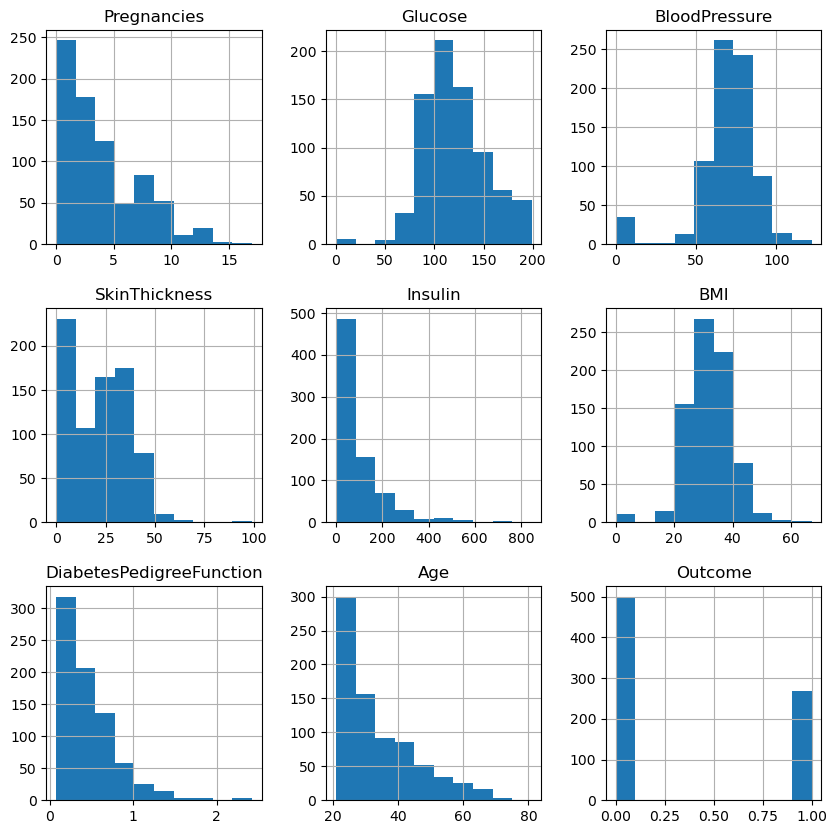

In [9]:
df.hist(figsize = (10,10))
plt.show()

### 4. Correlation analysis

In this step I compute the Pearson correlation matrix between all numerical features. The goal is to see which variables move together, which ones are weakly related, and how strongly each feature correlates with the diabetes outcome.


In [10]:
#Correlation analysis
round(df.corr(method = 'pearson'), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.14,-0.08,-0.07,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.15,0.06,0.33,0.22,0.14,0.26,0.47
BloodPressure,0.14,0.15,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,-0.08,0.06,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,-0.07,0.33,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.02,0.22,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,-0.03,0.14,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.54,0.26,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.22,0.47,0.07,0.07,0.13,0.29,0.17,0.24,1.00


### 5. Target distribution

I analyze the distribution of the Outcome variable (0: non-diabetic, 1: diabetic) to check for class imbalance. Understanding how many positive and negative samples I have is important for choosing evaluation metrics and interpreting model performance.


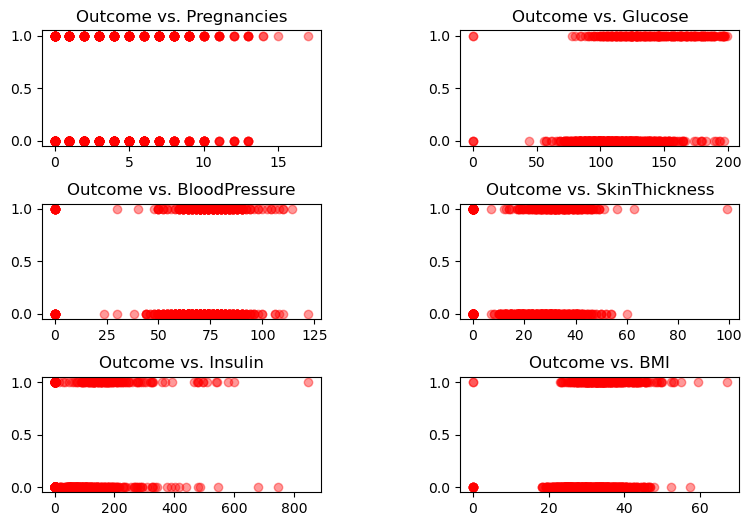

In [11]:
#Scatter plot
var_ind = [0,1,2,3,4,5,6,7]
plt.figure(figsize = (9, 6))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 7):
    plt.subplot(3, 2, i)
    plt.scatter(x = df.iloc[: , var_ind[i - 1]], y = df['Outcome'], alpha = 0.4, color = 'red')
    plt.title('Outcome vs. ' + df.columns[var_ind[i - 1]])

In [12]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
numeric_columns = ['Insulin', 'DiabetesPedigreeFunction',]

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

### 6. Data cleaning and preprocessing

Some medical measurements such as Glucose, BloodPressure, SkinThickness, Insulin and BMI cannot realistically be zero, so zeros in these columns are treated as missing values and imputed. After handling missing data, I standardize the features so that all variables are on a comparable scale and then split the dataset into training and test sets for unbiased evaluation.


In [15]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # median برای داده‌های بالینی معمولاً خوبه
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', max_iter=2000))
])

In [16]:
X = df_prep.drop(columns=['Outcome'])
y = df_prep['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
print("Train/test sizes:", X_train.shape, X_test.shape)

Train/test sizes: (614, 8) (154, 8)


In [18]:
param_grid = {
    'clf__penalty': ['l2', 'l1'],
    'clf__C': [0.01, 0.1, 1, 10, 100]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
print("Best CV ROC AUC:", grid.best_score_)

best_model = grid.best_estimator_

Best params: {'clf__C': 0.1, 'clf__penalty': 'l2'}
Best CV ROC AUC: 0.8438635105204872


In [19]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Brier score:", brier_score_loss(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7012987012987013
ROC AUC: 0.8098148148148149
Brier score: 0.17321537067494194

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [20]:
# show column with nan values
na_cols = df_prep.isna().any()
na_cols = na_cols[na_cols == True] 
print("these are nan cols \n")
print(na_cols)
print("\n")

these are nan cols 

Glucose          True
BloodPressure    True
SkinThickness    True
Insulin          True
BMI              True
dtype: bool




In [21]:
for col in na_cols.index:
    median = df_prep[col].median(skipna=True)
    df_prep[col] = df_prep[col].fillna(median)

In [22]:
X = df_prep.drop(columns=['Outcome'])
y = df_prep['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
print("Train/test sizes:", X_train.shape, X_test.shape)

Train/test sizes: (614, 8) (154, 8)


## 7. Statistical logistic regression (Statsmodels)

I first fit a logistic regression model using Statsmodels to obtain detailed statistical output, including coefficients and p‑values. This step provides insight into which features are most strongly associated with the probability of having diabetes from a statistical modelling perspective.


In [24]:
logit_model = sm.Logit(y_train, X_train)
logit_result = logit_model.fit()

logit_result.summary()

Optimization terminated successfully.
         Current function value: 0.583579
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Dec 2025   Pseudo R-squ.:                 0.09737
Time:                        18:10:24   Log-Likelihood:                -358.32
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 4.867e-14
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1211      0.033      3.686      0.000       0.057       0.185
Glucose                      0.0221      0.004      6.118      0.000       0.015       0.029
BloodPressure               -0.0567      0.008     -7.400      0.000      -0.072      -0.042
SkinThickness               -0.0076      0.012     -0.626      0.532      -0.031       0.016
Insulin                      0.0004      0.001      0.270      0.787      -0.002       0.003
BMI                          0.0165      0.016      1.028      0.304      -0.015       0.048
DiabetesPedigreeFunction     0.2595      0.282      0.921      0.357      -0.293       0.812
Age                         -0.0040      0.010     -0.412      0.680      -0.023       0.015
============================================================================================
"""

### 8. Baseline logistic regression model

Here I train a logistic regression classifier from scikit-learn on the standardized training data. I evaluate it using accuracy, confusion matrix to establish a baseline performance for diabetes prediction.


Accuracy: 72.80%
Accuracy: 71.43%


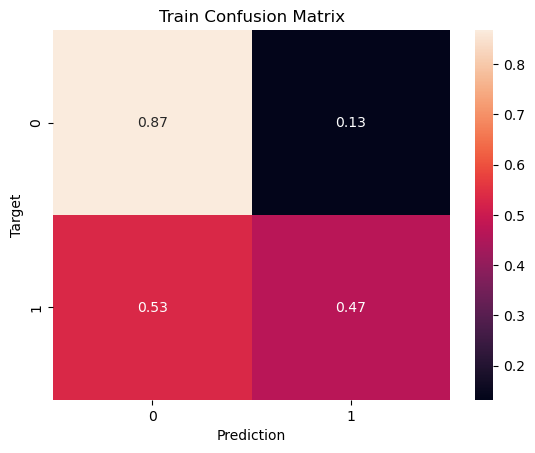

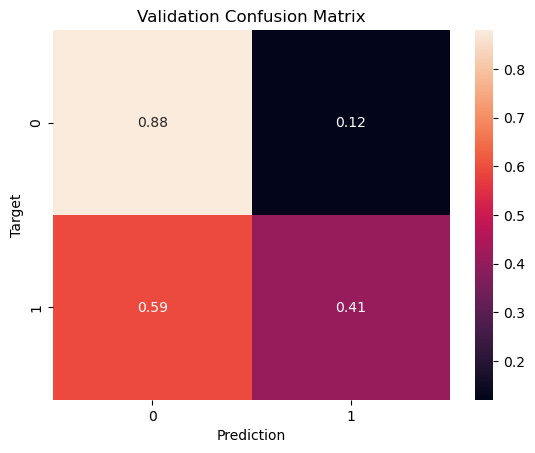

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(C=0.1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return accuracy

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

models_comp = pd.DataFrame({'Train Accuracy': train_preds,
                            'Test Accuracy': val_preds},
                           index = ['LogisticRegression'])

In [26]:
# data_final_vars=df.columns.values.tolist()
# y=['y']
# X=[i for i in data_final_vars if i not in y]

In [27]:
# plt.figure(figsize=(20, 17))
# matrix = np.triu(df.corr())
# sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

In [28]:
# hig_corr = df.corr()
# hig_corr_features = hig_corr.index[abs(hig_corr["Outcome"]) >= 0.2]
# hig_corr_features

In [29]:
#Standard Deviation
df.var()

Pregnancies                   11.354056
Glucose                     1022.248314
BloodPressure                374.647271
SkinThickness                254.473245
Insulin                     8770.036047
BMI                           62.159984
DiabetesPedigreeFunction       0.081621
Age                          138.303046
Outcome                        0.227483
dtype: float64

## 9. Training alternative classifiers

To benchmark logistic regression, I also train a range of other classifiers: Decision Tree, Random Forest, K‑Nearest Neighbors, Support Vector Machine, AdaBoost, Gradient Boosting and XGBoost. All models are trained on the same preprocessed data so that their performance can be compared fairly.


In [30]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [31]:
model_2.score(X_train,y_train)

1.0

Accuracy: 100.00%
Accuracy: 77.92%


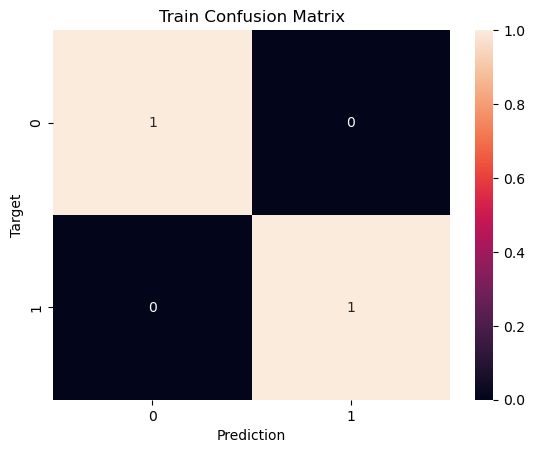

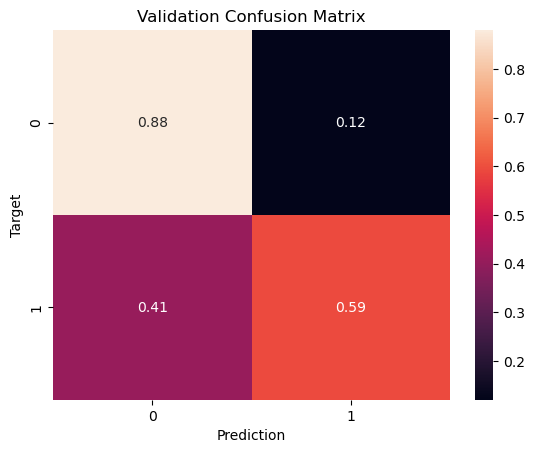

In [32]:
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return accuracy*100

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')


models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_preds,
                                       'Test Accuracy': val_preds},
                                      index = ['RandomForestClassifier'])])

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [10, 20, 30],  # Adjust the number of trees in the forest
    'max_depth': [10, 20, 30],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['RandomForestClassifier-Tuned'])])

Training Accuracy: 0.8762214983713354
Validation Accuracy: 0.7142857142857143


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

train_accuracy = decision_tree_model.score(X_train, y_train)
val_accuracy = decision_tree_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['DecisionTreeClassifier'])])

Training Accuracy: 1.0
Validation Accuracy: 0.6818181818181818


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 3, 5, 7],
    'criterion': ['gini', 'entropy']  # Add criterion hyperparameter
}

decision_tree_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['DecisionTreeClassifier-tuned'])])

Training Accuracy: 0.8403908794788274
Validation Accuracy: 0.6948051948051948


Training Accuracy: 0.8094462540716613
Validation Accuracy: 0.6753246753246753


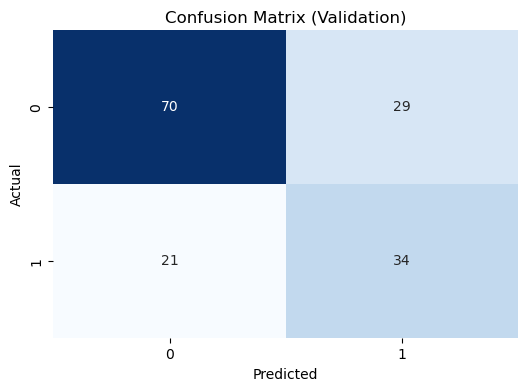

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_train_pred = knn_model.predict(X_train)

y_val_pred = knn_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['KNeighborsClassifier'])])


confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]  # Adjust the number of neighbors to explore
}

knn_model = KNeighborsClassifier()


# For selected models I perform hyperparameter tuning with grid search and cross-validation.
# The goal is to find better parameter settings (such as tree depth, number of estimators or regularization strength) that
# can improve generalization performance on unseen data.

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)

y_val_pred = best_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy with Best Hyperparameters:", train_accuracy)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['KNeighborsClassifier-tuned'])])

Training Accuracy with Best Hyperparameters: 0.7964169381107492
Validation Accuracy with Best Hyperparameters: 0.6753246753246753


Training Accuracy: 0.7687296416938111
Validation Accuracy: 0.7597402597402597


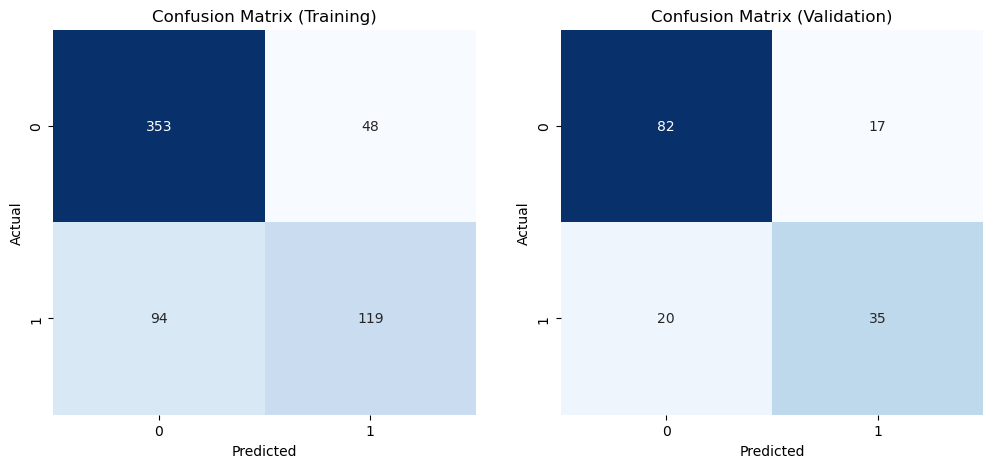

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)

y_val_pred = svm_model.predict(X_val)

train_accuracy = accuracy_score(y_train, y_train_pred)

val_accuracy = accuracy_score(y_val, y_val_pred)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy,
                                       'Test Accuracy': val_accuracy},
                                      index = ['SVM'])])

train_confusion = confusion_matrix(y_train, y_train_pred)
val_confusion = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Training)')

plt.subplot(1, 2, 2)
sns.heatmap(val_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Validation)')
plt.show()

AdaBoost Training Accuracy: 0.8045602605863192
AdaBoost Validation Accuracy: 0.7532467532467533


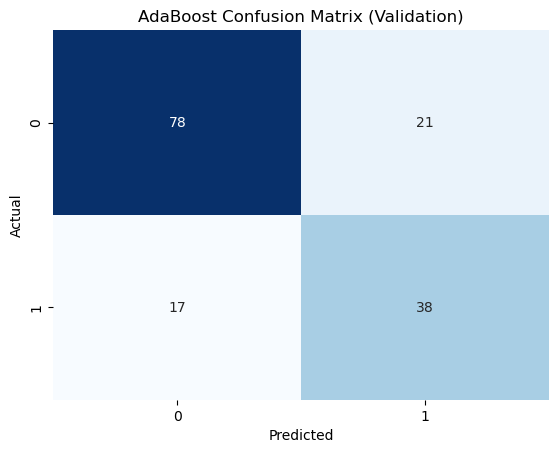

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

adaboost_model.fit(X_train, y_train)

y_train_pred_adaboost = adaboost_model.predict(X_train)

y_val_pred_adaboost = adaboost_model.predict(X_val)

train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)

val_accuracy_adaboost = accuracy_score(y_val, y_val_pred_adaboost)

print("AdaBoost Training Accuracy:", train_accuracy_adaboost)
print("AdaBoost Validation Accuracy:", val_accuracy_adaboost)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy_adaboost,
                                       'Test Accuracy': val_accuracy_adaboost},
                                      index = ['AdaBoostClassifier'])])

confusion_adaboost = confusion_matrix(y_val, y_val_pred_adaboost)

# Plot the confusion matrix
plt.figure()
sns.heatmap(confusion_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost Confusion Matrix (Validation)')
plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the GBM model to the training data
gbm_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_gbm = gbm_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_gbm = gbm_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_gbm = accuracy_score(y_train, y_train_pred_gbm)

# Calculate the validation accuracy
val_accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)

# Print the training and validation accuracies
print("GBM Training Accuracy:", train_accuracy_gbm)
print("GBM Validation Accuracy:", val_accuracy_gbm)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy_gbm,
                                       'Test Accuracy': val_accuracy_gbm},
                                      index = ['GradientBoostingClassifier'])])

GBM Training Accuracy: 0.9267100977198697
GBM Validation Accuracy: 0.7597402597402597


In [41]:
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgboost_model = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fit the XGBoost model to the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred_xgboost = xgboost_model.predict(X_train)

# Make predictions on the validation data
y_val_pred_xgboost = xgboost_model.predict(X_val)

# Calculate the training accuracy
train_accuracy_xgboost = accuracy_score(y_train, y_train_pred_xgboost)

# Calculate the validation accuracy
val_accuracy_xgboost = accuracy_score(y_val, y_val_pred_xgboost)

# Print the training and validation accuracies
print("XGBoost Training Accuracy:", train_accuracy_xgboost)
print("XGBoost Validation Accuracy:", val_accuracy_xgboost)

models_comp = pd.concat([models_comp,
                         pd.DataFrame({'Train Accuracy': train_accuracy_xgboost,
                                       'Test Accuracy': val_accuracy_xgboost},
                                      index = ['XGBClassifier'])])

XGBoost Training Accuracy: 0.9853420195439739
XGBoost Validation Accuracy: 0.7272727272727273


### 10. Model comparison

In this summary table I report training and test accuracy for each classifier, both before and after tuning when applicable. This comparison highlights which models overfit, which ones underfit, and which algorithm offers the best balance between performance and complexity for this dataset.


In [42]:
models_comp

,Train Accuracy,Test Accuracy
LogisticRegression,0.728013,0.714286
RandomForestClassifier,100.000000,77.922078
RandomForestClassifier-Tuned,0.876221,0.714286
DecisionTreeClassifier,1.000000,0.681818
DecisionTreeClassifier-tuned,0.840391,0.694805
KNeighborsClassifier,0.809446,0.675325
KNeighborsClassifier-tuned,0.796417,0.675325
SVM,0.768730,0.759740
AdaBoostClassifier,0.804560,0.753247
GradientBoostingClassifier,0.926710,0.759740
